<a href="https://colab.research.google.com/github/Noor-Islam16/DiabeticRetinopathyusingInceptionV3/blob/master/DR_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Development of a Diabetic Retinopathy Classification Model Using InceptionV3***

***This Python script utilizes PyTorch and the InceptionV3 architecture to create a robust Diabetic Retinopathy classification model. The dataset, sourced from Google Drive, undergoes preprocessing and is split into training, validation, and testing sets. The model is trained over 25 epochs, with detailed evaluation metrics, including accuracy, confusion matrix, and classification report. The overall specificity and sensitivity are calculated, providing a comprehensive analysis of the model's performance in detecting Diabetic Retinopathy. Visualization of the test confusion matrix enhances interpretability.***

# ***Imports and Data Loading***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Dataset/DiaDataset.zip

Archive:  /content/drive/MyDrive/Dataset/DiaDataset.zip
replace DiaDataset/test_uptoCLAHEall/test_uptoCLAHE_GRADE0/20051020_44982_0100_PP.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets, models
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# ***Data Transformations and Dataset Creation***

In [ ]:
# Data transformations
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # InceptionV3 requires input size (299, 299)
    transforms.ToTensor(),
])


In [ ]:
# Create an instance of the ImageFolder dataset
dataset = datasets.ImageFolder(root='/content/DiaDataset/train_uptoCLAHEall', transform=transform)


In [ ]:
# Split the dataset into train and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


In [ ]:
# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset, batch_size=32, shuffle=False)  # Use the entire dataset for testing


# ***Model Definition and Configuration***

In [ ]:
# Define InceptionV3 model
model = models.inception_v3(pretrained=True, aux_logits=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(dataset.classes))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ***Training Loop***

In [ ]:
# Training loop
num_epochs = 15

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    # Use tqdm for progress bar
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', dynamic_ncols=True)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs, _ = model(inputs)  # Extract logits from the output
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Update progress bar with loss value
        progress_bar.set_postfix(loss=f'{total_loss / len(progress_bar):.4f}')

    # Optional: Print the average loss for the epoch
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {total_loss / len(train_loader):.4f}')


Epoch 1/15: 100%|██████████| 23/23 [10:57<00:00, 28.60s/it, loss=1.1579]


Epoch 1/15, Average Training Loss: 1.1579


Epoch 2/15: 100%|██████████| 23/23 [10:45<00:00, 28.09s/it, loss=0.9141]


Epoch 2/15, Average Training Loss: 0.9141


Epoch 3/15: 100%|██████████| 23/23 [10:44<00:00, 28.04s/it, loss=0.7927]


Epoch 3/15, Average Training Loss: 0.7927


Epoch 4/15: 100%|██████████| 23/23 [10:44<00:00, 28.00s/it, loss=0.6858]


Epoch 4/15, Average Training Loss: 0.6858


Epoch 5/15: 100%|██████████| 23/23 [10:48<00:00, 28.19s/it, loss=0.6271]


Epoch 5/15, Average Training Loss: 0.6271


Epoch 6/15: 100%|██████████| 23/23 [10:47<00:00, 28.15s/it, loss=0.5697]


Epoch 6/15, Average Training Loss: 0.5697


Epoch 7/15: 100%|██████████| 23/23 [10:51<00:00, 28.34s/it, loss=0.4155]


Epoch 7/15, Average Training Loss: 0.4155


Epoch 8/15: 100%|██████████| 23/23 [10:43<00:00, 27.97s/it, loss=0.3255]


Epoch 8/15, Average Training Loss: 0.3255


Epoch 9/15: 100%|██████████| 23/23 [10:48<00:00, 28.20s/it, loss=0.2559]


Epoch 9/15, Average Training Loss: 0.2559


Epoch 10/15: 100%|██████████| 23/23 [10:46<00:00, 28.11s/it, loss=0.2224]


Epoch 10/15, Average Training Loss: 0.2224


Epoch 11/15: 100%|██████████| 23/23 [10:41<00:00, 27.89s/it, loss=0.2898]


Epoch 11/15, Average Training Loss: 0.2898


Epoch 12/15: 100%|██████████| 23/23 [10:42<00:00, 27.92s/it, loss=0.2370]


Epoch 12/15, Average Training Loss: 0.2370


Epoch 13/15: 100%|██████████| 23/23 [10:42<00:00, 27.92s/it, loss=0.1430]


Epoch 13/15, Average Training Loss: 0.1430


Epoch 14/15: 100%|██████████| 23/23 [10:37<00:00, 27.71s/it, loss=0.1717]


Epoch 14/15, Average Training Loss: 0.1717


Epoch 15/15: 100%|██████████| 23/23 [10:37<00:00, 27.71s/it, loss=0.1391]

Epoch 15/15, Average Training Loss: 0.1391


In [ ]:
# Training loop
num_epochs = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    # Use tqdm for progress bar
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', dynamic_ncols=True)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs, _ = model(inputs)  # Extract logits from the output
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Update progress bar with loss value
        progress_bar.set_postfix(loss=f'{total_loss / len(progress_bar):.4f}')

    # Optional: Print the average loss for the epoch
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {total_loss / len(train_loader):.4f}')


Epoch 1/10: 100%|██████████| 23/23 [10:52<00:00, 28.37s/it, loss=0.1033]


Epoch 1/10, Average Training Loss: 0.1033


Epoch 2/10: 100%|██████████| 23/23 [10:55<00:00, 28.48s/it, loss=0.0796]


Epoch 2/10, Average Training Loss: 0.0796


Epoch 3/10: 100%|██████████| 23/23 [10:48<00:00, 28.18s/it, loss=0.0771]


Epoch 3/10, Average Training Loss: 0.0771


Epoch 4/10: 100%|██████████| 23/23 [10:47<00:00, 28.14s/it, loss=0.0612]


Epoch 4/10, Average Training Loss: 0.0612


Epoch 5/10: 100%|██████████| 23/23 [10:50<00:00, 28.27s/it, loss=0.0831]


Epoch 5/10, Average Training Loss: 0.0831


Epoch 6/10: 100%|██████████| 23/23 [11:02<00:00, 28.79s/it, loss=0.0672]


Epoch 6/10, Average Training Loss: 0.0672


Epoch 7/10: 100%|██████████| 23/23 [10:51<00:00, 28.32s/it, loss=0.0355]


Epoch 7/10, Average Training Loss: 0.0355


Epoch 8/10: 100%|██████████| 23/23 [10:39<00:00, 27.82s/it, loss=0.0204]


Epoch 8/10, Average Training Loss: 0.0204


Epoch 9/10: 100%|██████████| 23/23 [10:41<00:00, 27.89s/it, loss=0.0221]


Epoch 9/10, Average Training Loss: 0.0221


Epoch 10/10: 100%|██████████| 23/23 [10:51<00:00, 28.31s/it, loss=0.0329]

Epoch 10/10, Average Training Loss: 0.0329


# ***Validation***

In [ ]:
    # Validation
    model.eval()
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    # Calculate validation metrics
    val_accuracy = accuracy_score(val_labels, val_preds)
    val_conf_matrix = confusion_matrix(val_labels, val_preds)
    val_report = classification_report(val_labels, val_preds)

    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Accuracy: {val_accuracy * 100:.2f}%')
    print('Validation Confusion Matrix:')
    print(val_conf_matrix)
    print('Validation Classification Report:')
    print(val_report)

Epoch 10/10, Validation Accuracy: 61.41%
Validation Confusion Matrix:
[[61 12  0  0]
 [18  8  3  0]
 [12  8 13  7]
 [ 7  1  3 31]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.84      0.71        73
           1       0.28      0.28      0.28        29
           2       0.68      0.33      0.44        40
           3       0.82      0.74      0.78        42

    accuracy                           0.61       184
   macro avg       0.60      0.54      0.55       184
weighted avg       0.63      0.61      0.60       184



# ***Testing and Evaluation***

In [ ]:
# Testing and evaluation with progress bar
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    # Use tqdm for progress bar
    progress_bar = tqdm(test_loader, desc='Testing', dynamic_ncols=True)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Update progress bar
        progress_bar.set_postfix(accuracy=f'{accuracy_score(all_labels, all_preds) * 100:.2f}%')


Testing: 100%|██████████| 29/29 [04:31<00:00,  9.36s/it, accuracy=91.41%]


# ***Metrics Calculation and Display***

In [ ]:
# Calculate overall specificity and sensitivity
class_count = len(conf_matrix)
total_true_positive = np.sum(np.diag(conf_matrix))
total_false_positive = np.sum(conf_matrix, axis=0) - np.diag(conf_matrix)
total_false_negative = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
total_true_negative = np.sum(conf_matrix) - (total_true_positive + total_false_positive + total_false_negative)

overall_specificity = np.sum(total_true_negative / (total_true_negative + total_false_positive)) / class_count
overall_sensitivity = np.sum(total_true_positive / (total_true_positive + total_false_negative)) / class_count

print(f'Overall Specificity: {overall_specificity * 100:.2f}%')
print(f'Overall Sensitivity: {overall_sensitivity * 100:.2f}%')

Overall Specificity: 66.34%
Overall Sensitivity: 96.04%


In [ ]:
# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
conf_matrix = confusion_matrix(all_labels, all_preds)
report = classification_report(all_labels, all_preds)

print(f'Test Accuracy: {accuracy * 100:.2f}%')
print('Test Confusion Matrix:')
print(conf_matrix)
print('Test Classification Report:')
print(report)

Test Accuracy: 91.41%
Test Confusion Matrix:
[[404  18   0   0]
 [ 18 107   3   0]
 [ 13   8 167   8]
 [  7   1   3 163]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       422
           1       0.80      0.84      0.82       128
           2       0.97      0.85      0.91       196
           3       0.95      0.94      0.94       174

    accuracy                           0.91       920
   macro avg       0.91      0.90      0.90       920
weighted avg       0.92      0.91      0.91       920



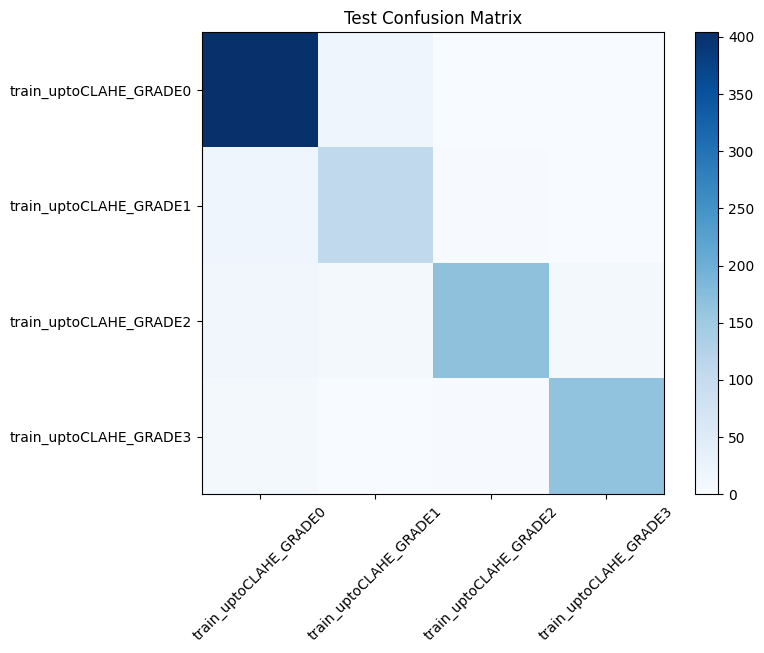

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(dataset.classes)), dataset.classes, rotation=45)
plt.yticks(np.arange(len(dataset.classes)), dataset.classes)
plt.show()